In [55]:
import numpy as np
from math import *
from scipy.stats import levy_stable, kstest, ks_2samp
from scipy.integrate import simps
from sklearn.neighbors import KernelDensity


import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm

In [56]:
def show_function_info(data, label=''):
  # print(label)
  plt.plot(data, label=label, c='purple')
  plt.show()

  sns.kdeplot(data, c='black')
  plt.show()
  
  print("Initial timeseries is", len(data) , "len")

In [57]:
alpha, beta, gamma, delta = 1.7, 0.0, 1., 1.
prcentile_val = 1
size = 750


eps = 0.01
stable_dst_cnt=100

In [58]:
def calc_nreturn(r1_list, n=10):
  """
  len(r1_list) == n
  """
  return10 = 1
  for r1 in r1_list:
    return10 *= (r1+1)
  return return10-1


In [59]:
def calcul_percentile():
  returns_1day = levy_stable.rvs(alpha, beta, gamma, delta, size=size)
  returns_10day = []
  for idx in range(len(returns_1day) - 11):
    ret = calc_nreturn(returns_1day[idx:idx+10])
    returns_10day.append(ret)

  percentile = np.percentile(returns_10day, prcentile_val) 

  # show_function_info(price, label='PRICE')
  # show_function_info(returns_1day, label='1d RETURN')
  # show_function_info(returns_10day, label='10d RETURN')
  # print(percentile)
  return np.array(returns_10day), percentile
  

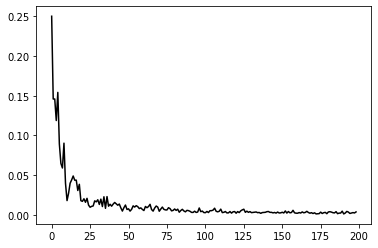

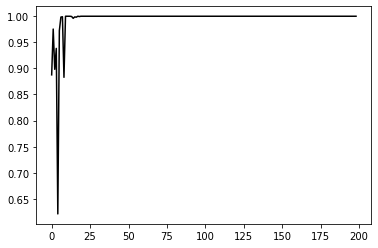

0.003699748743718593
1.0
1600


In [81]:
arr = []
mean_vals= []
distrib = []
returns_10day_accum = []
hists = []
global_counter = 0

statictic_list = [] 
pvalue_list = []

for i in tqdm(range(200)):
  returns_10day, percentile = calcul_percentile()
  if global_counter>0:
    last = returns_10day_accum[:]
  returns_10day_accum.extend(returns_10day[returns_10day<=percentile])
  if global_counter>0:
    # results = kstest(returns_10day_accum, lambda ac_hist: ac_hist)
    results = ks_2samp(last, returns_10day_accum)
    statictic_list.append(results[0])
    pvalue_list.append(results[1])
    # print(len(last), len(returns_10day_accum), statictic_list[-1], pvalue_list[-1])

  ac_hist = np.cumsum(np.histogram(returns_10day_accum, bins=100)[0]/len(returns_10day_accum))
  hists.append(ac_hist)

  global_counter += 1
  # plt.bar(range(100), hists[-1])
  # plt.show()
  # arr.append(percentile)

# plt.plot(mean_vals, c='purple')
# plt.show()
# plt.plot(arr, c='black')
# plt.show()
plt.plot(statictic_list, c='black')
plt.show()
plt.plot(pvalue_list, c='black')
plt.show()
print(results_list[-1])
print(pvalue_list[-1])

print(len(returns_10day_accum))

In [86]:
# a = 1-2*exp(-2*1600*0.0036118090452261307**2)
# ka = sqrt(-0.5 * log((1-a)/2))
ka = 0.001

0.001  <-->  0.3125
0.001  <-->  0.14583333333333334
0.001  <-->  0.11458333333333333
0.001  <-->  0.0625
0.001  <-->  0.1
0.001  <-->  0.08630952380952381
0.001  <-->  0.08705357142857142
0.001  <-->  0.06770833333333333
0.001  <-->  0.058333333333333334
0.001  <-->  0.03068181818181818
0.001  <-->  0.06818181818181818
0.001  <-->  0.015224358974358974
0.001  <-->  0.019917582417582416
0.001  <-->  0.03988095238095238
0.001  <-->  0.03958333333333333
0.001  <-->  0.019761029411764705
0.001  <-->  0.03553921568627451
0.001  <-->  0.00804093567251462
0.001  <-->  0.024671052631578948
0.001  <-->  0.03005952380952381
0.001  <-->  0.012175324675324676
0.001  <-->  0.018774703557312252
0.001  <-->  0.025588768115942028
0.001  <-->  0.024583333333333332
0.001  <-->  0.025
0.001  <-->  0.01282051282051282
0.001  <-->  0.016203703703703703
0.001  <-->  0.011545566502463054
0.001  <-->  0.014224137931034483
0.001  <-->  0.015860215053763442
0.001  <-->  0.021043346774193547
0.001  <-->  0.0181

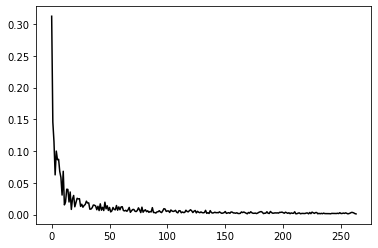

2120


In [87]:
results = np.inf
global_counter = 0
results_list = []
returns_10day_accum = []

while ka <= results:
  returns_10day, percentile = calcul_percentile()
  if global_counter>0:
    last = returns_10day_accum[:]
  returns_10day_accum.extend(returns_10day[returns_10day<=percentile])
  if global_counter>0:
    # results = kstest(returns_10day_accum, lambda ac_hist: ac_hist)
    results = ks_2samp(last, returns_10day_accum)[0]
    print(ka, ' <--> ', results)
    results_list.append(results)
  # ac_hist = np.cumsum(np.histogram(returns_10day_accum, bins=100)[0]/len(returns_10day_accum))
  # hists.append(ac_hist)
  global_counter += 1
plt.plot(results_list, c='black')
plt.show()
print(len(returns_10day_accum))

#  вы должны отказаться от теста, если значение p меньше вашего значения значимости. В случае, если нулевая гипотеза не может быть отвергнута, вы можете сравнить значения D и выбрать распределение с наименьшим значением D, поскольку оно означает соответствие качества: чем меньше значение D, тем лучше оно соответствует данным.
. D-статистика - это абсолютное максимальное расстояние (супремум) между CDF двух выборок. Чем ближе это число к 0, тем более вероятно, что две выборки были взяты из одного и того же распределения.